## 最小二乘法拟合
最小二乘法是一种数学优化技术，它通过最小化误差的平方和寻找数据的最佳函数匹配。  
拟合关注的是目前的数据，尽量使已知的数据减少误差（拟合参差）。  
而回归还要考虑的输入输出具有噪声，同时关注未来的数据，要使现在和未来可能出现的数据误差尽量小。

- scipy.optimization 子模块提供了函数最小值(标量或多维)、曲线拟合和寻找等式的根的有用算法。在optimize模块中可以使用 leastsq() 对数据进行最小二乘拟合计算。  
- leastsq() 函数传入误差计算函数和初始值，该初始值将作为误差计算函数的第一个参数传入。计算的结果是一个包含两个元素的元组，第一个元素是一个数组，表示拟合后的参数；第二个元素如果等于1、2、3、4中的其中一个整数，则拟合成功，否则将会返回 mesg。

In [1]:
# 倒入模块
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

In [2]:
# 原函数
def Fun(p, x):
    a1, a2, a3 = p
    return a1*x**2 + a2*x + a3

# 参差
def error(p, x, y):
    return Fun(p, x) - y

In [5]:
# 原始参数
p_value = [-2, 5, 10]
x = np.linspace(-10, 10, 100)

# 加上随机噪声
noise = np.random.randn(len(x)) # 产生一些0.几的小数
y = Fun(p_value, x) + noise*2

# 拟合的初始参数设置
p0 = [0.1,-0.01,100] 

In [6]:
# 进行拟合
para = leastsq(error, p0, args=(x, y))

# para[0]为拟合后的参数，y_fitted为拟合得到的函数
y_fitted = Fun(para[0], x)

/home/starslayerxleo/apps/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/starslayerxleo/apps/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/starslayerxleo/apps/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22122 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/starslayerxleo/apps/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/starslayerxleo/apps/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21518 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/starslayerxleo

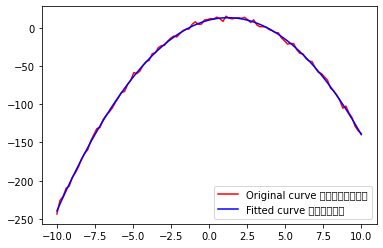

拟合得到的参数: [-1.99818393  4.99059444 10.18693857]


In [9]:
plt.figure
plt.plot(x,y,'r', label = 'Original curve 加上噪声后的曲线')
plt.plot(x,y_fitted,'-b', label ='Fitted curve 拟合后的曲线')
plt.legend()
plt.show()
print('拟合得到的参数:', para[0])